In [12]:
import pandas as pd


In [13]:
data = pd.read_csv('/Churn_Modelling.csv');
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# New Section

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
data.tail()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [16]:
data.shape

(10000, 14)

In [17]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 10000
Number of Columns 14


In [18]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [19]:
data.isnull()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
data.isnull().sum()


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [21]:
data.describe(include='all')


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [22]:
data.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [23]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)


In [24]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [26]:
# Replace 'Geography' with the actual column you want to one-hot encode
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)

In [27]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,Female,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,False,True


In [28]:
data['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


<Axes: xlabel='Exited', ylabel='count'>

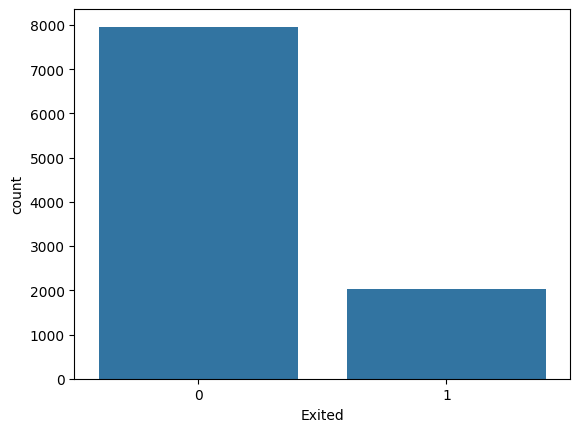

In [29]:
import seaborn as sns
sns.countplot(x='Exited',data=data)

In [30]:
x = data.drop('Exited',axis=1)
y = data['Exited']
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming 'x' is your DataFrame with categorical features
for col in x.select_dtypes(include=['object']):
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])

# Now apply SMOTE
x_res, y_res = SMOTE().fit_resample(x, y)

In [33]:
y_res.value_counts()

,count
Exited,
1,7963
0,7963


In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.20,random_state=42) # Changed 'startify' to 'stratify'

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
sc = StandardScaler()


In [37]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'Gender' is the only categorical column
categorical_features = ['Gender']
# If there are other categorical columns, include them in the list above

transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x_train.columns.difference(categorical_features)), # Apply StandardScaler to numerical columns
        ('cat', OneHotEncoder(), categorical_features) # Apply OneHotEncoder to categorical columns
    ],
    remainder='passthrough' # Keep any remaining columns unchanged
)

x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

In [38]:
x_train


array([[-0.80391989,  0.60222273, -1.17388905, ...,  1.18510061,
         1.        ,  0.        ],
       [ 0.09942639,  0.77554674,  1.10147366, ..., -1.39717247,
         0.        ,  1.        ],
       [ 0.50091363,  0.35973205, -1.49112712, ..., -1.39717247,
         0.        ,  1.        ],
       ...,
       [ 0.1997982 ,  1.76072949,  0.20445567, ...,  1.18510061,
         0.        ,  1.        ],
       [-0.70354808, -1.33946104,  1.05771668, ..., -1.02827632,
         1.        ,  0.        ],
       [ 1.00277268,  1.0710748 ,  0.53263298, ..., -1.39717247,
         0.        ,  1.        ]])

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
log = LogisticRegression()

In [41]:
log.fit(x_train,y_train)

LogisticRegression()

In [42]:
y_pred1=log.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test,y_pred1)


0.7903327055869429

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [46]:
precision_score(y_test,y_pred1)

0.7791798107255521

In [47]:
recall_score(y_test,y_pred1)

0.7952350289761752

In [48]:
f1_score(y_test,y_pred1)

0.787125557680051

In [49]:
accuracy_score(y_test,y_pred1)

0.7903327055869429

In [50]:
from sklearn import svm

In [51]:
svm = svm.SVC()

In [52]:
svm.fit(x_train,y_train)

SVC()

In [53]:
y_pred2= svm.predict(x_test)

In [54]:
accuracy_score(y_test,y_pred2)

0.8455743879472694

In [55]:
precision_score(y_test,y_pred2)

0.8474132285527177

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn = KNeighborsClassifier()


In [58]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [59]:
y_pred3 = knn.predict(x_test)

In [60]:
accuracy_score(y_test,y_pred3)

0.839924670433145

In [61]:
precision_score(y_test,y_pred3)

0.8241143567433188

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dt= DecisionTreeClassifier()

In [64]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [65]:
y_pred4 = dt.predict(x_test)

In [66]:
accuracy_score(y_test,y_pred4)

0.8085373509102323

In [67]:
precision_score(y_test,y_pred4)

0.7912291537986411

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf = RandomForestClassifier()

In [70]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [71]:
y_pred5 = rf.predict(x_test)

In [72]:
accuracy_score(y_test,y_pred5)

0.8735091023226617

In [73]:
precision_score(y_test,y_pred5)

0.8648477157360406

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
gdc=GradientBoostingClassifier()

In [76]:
gdc.fit(x_train,y_train)

GradientBoostingClassifier()

In [77]:
y_pred6 = gdc.predict(x_test)

In [78]:
accuracy_score(y_test,y_pred6)

0.8462021343377275

In [79]:
precision_score(y_test,y_pred6)

0.8391831525207403

In [80]:
import pandas as pd # Import the pandas library and alias it as 'pd'

final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                           'ACC':[accuracy_score(y_test,y_pred1),
                                  accuracy_score(y_test,y_pred2),
                                  accuracy_score(y_test,y_pred3),
                                  accuracy_score(y_test,y_pred4),
                                  accuracy_score(y_test,y_pred5),
                                  accuracy_score(y_test,y_pred6)]} )

In [81]:
final_data

,Models,ACC
0,LR,0.790333
1,SVC,0.845574
2,KNN,0.839925
3,DT,0.808537
4,RF,0.873509
5,GBC,0.846202


In [82]:
import seaborn as sns


<Axes: xlabel='Models', ylabel='ACC'>

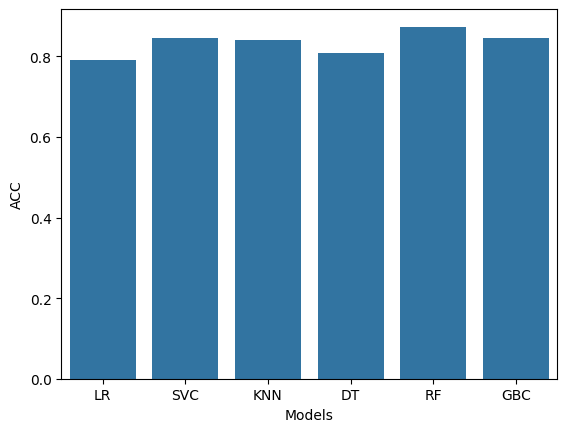

In [83]:
sns.barplot(x='Models', y='ACC', data=final_data)

In [84]:
import pandas as pd # Import the pandas library and alias it as 'pd'

final_data1 = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                           'PRE':[precision_score(y_test,y_pred1),
                                  precision_score(y_test,y_pred2),
                                  precision_score(y_test,y_pred3),
                                  precision_score(y_test,y_pred4),
                                  precision_score(y_test,y_pred5),
                                  precision_score(y_test,y_pred6)]} )

In [85]:
final_data1

,Models,PRE
0,LR,0.779180
1,SVC,0.847413
2,KNN,0.824114
3,DT,0.791229
4,RF,0.864848
5,GBC,0.839183


<Axes: xlabel='Models', ylabel='PRE'>

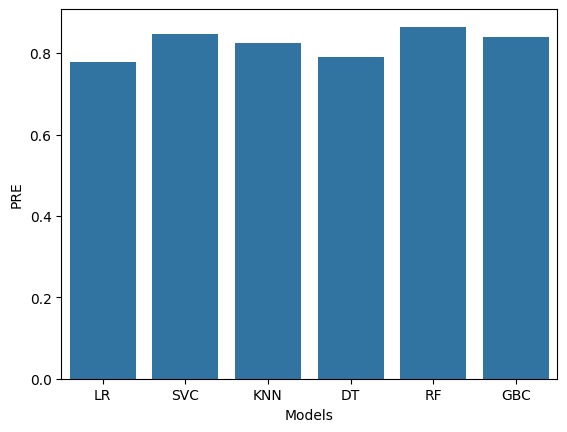

In [86]:
sns.barplot(x='Models', y='PRE', data= final_data1)

In [87]:
x_res=sc.fit_transform(x_res)

In [88]:
rf.fit(x_res,y_res)

RandomForestClassifier()

In [89]:
import joblib

In [90]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [91]:
model = joblib.load('churn_predict_model')

In [92]:
data.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [96]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([0])

In [94]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib

In [95]:
from logging import getLogRecordFactory
def show_entry_fields():
  p1=int(e1.get())
  p2=int(e2.get())
  p3=int(e3.get())
  p4=float(e4.get())
  p5=int(e5.get())
  p6=int(e6.get())
  p7=int(e7.get())
  p8=float(e8.get())
  p9=int(e9.get())
  if p9 == 1:
    Geography_Germany=1
    Geography_Spain=0
    Geography_France=0
  elif p9 == 2:
    Geography_Germany=0
    Geography_Spain=1
    Geography_France=0
  else:
    Geography_Germany=0
    Geography_Spain=0
    Geography_France=1
  p10=int(e10.get())
  model = joblib.load('churn_model')
  result=model.predict(sc.transform([p1,p2,p3,p4,p5,p6,p7,p8,Geography_Germany,
                                     Geography_Spain,p10]))
  if result == 0:
    Label(master, text="Customer will not churn").grid(row=31)
  else:
    Label(master, text="Customer will churn").grid(row=31)
  master = Tk()
  master.title("churn Prediction")
  label = Label(master, text="churn Prediction", bg='black', fg='white').grid(row=0,columnspan=2)
  Label(master, text="Enter the following details:").grid(row=1)
  Label(master, text="Credit Score").grid(row=2)
  Label(master, text="Age").grid(row=3)
  Label(master, text="Tenure").grid(row=4)
  Label(master, text="Balance").grid(row=5)
  Label(master, text="Number of Products").grid(row=6)
  Label(master, text="Estimated Salary").grid(row=7)
  Label(master, text="Gender").grid(row=8)
  Label(master, text="Geography").grid(row=9)
  Label(master, text="Has Credit Card").grid(row=10)

  e1=Entry(master)
  e2=Entry(master)
  e3=Entry(master)
  e4=Entry(master)
  e5=Entry(master)
  e6=Entry(master)
  e7=Entry(master)
  e8=Entry(master)
  e9=Entry(master)
  e10=Entry(master)


  e1.grid(row=1,column =1)
  e2.grid(row=2,column =1)
  e3.grid(row=3,column =1)
  e4.grid(row=4,column =1)
  e5.grid(row=5,column =1)
  e6.grid(row=6,column =1)
  e7.grid(row=7,column =1)
  e8.grid(row=8,column =1)
  e9.grid(row=9,column =1)
  e10.grid(row=10,column =1)

  Button(master, text='Predict', command=show_entry_fields()).grid()
  master.mainloop()